# INTRODUCCION
Los Ángeles es una ciudad vibrante y diversa, conocida por su amplia oferta gastronómica y su espíritu innovador. En un entorno tan competitivo, destacar en la industria de la restauración requiere creatividad y visión. Con esto en mente, hemos decidido abrir un café único en su clase, atendido exclusivamente por robots. Este concepto no solo promete una experiencia futurista y emocionante para los clientes, sino que también presenta un modelo de negocio potencialmente lucrativo.

Sin embargo, la novedad de los camareros robots puede no ser suficiente para garantizar el éxito a largo plazo. Para atraer inversionistas y asegurar la viabilidad del proyecto, es crucial entender las condiciones actuales del mercado y cómo nuestro café se puede posicionar estratégicamente. Por esta razón, hemos llevado a cabo un estudio de mercado detallado basado en datos de restaurantes en Los Ángeles.

Este informe cubre los siguientes puntos clave:

Proporciones de los Distintos Tipos de Establecimientos: Analizaremos qué tipos de restaurantes son más comunes en Los Ángeles y cómo se distribuyen en el mercado.
Proporciones de Establecimientos que Pertenecen a una Cadena: Examinaremos cuántos establecimientos son parte de una cadena y cuántos son independientes.
Características de las Cadenas: Identificaremos qué tipos de restaurantes suelen formar parte de cadenas y sus características en términos de tamaño y distribución.
Promedio de Número de Asientos: Determinaremos el tamaño promedio de los establecimientos según su tipo, y cuáles tienen mayor capacidad.
Análisis de Ubicación: Evaluaremos las mejores ubicaciones en términos de calles con mayor número de restaurantes y la distribución del número de asientos en estas áreas.
Este análisis nos permitirá tomar decisiones informadas sobre el tipo de café, el tamaño ideal y las ubicaciones más estratégicas para maximizar nuestras posibilidades de éxito. Además, proporcionará a los inversionistas una visión clara y fundamentada de las oportunidades y desafíos del mercado, asegurando que nuestra propuesta sea atractiva y convincente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# IMPORTACION DE LIBRERIAS

In [2]:
datos = pd.read_csv('/datasets/rest_data_us_upd.csv')

# INFORMACION EN EL DATASET

In [3]:
display(datos.head())

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
display(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None

# valores ausentes o duplicados

In [5]:
missing_values = datos.isnull().sum()

missing_values

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [6]:
duplicated_rows = datos.duplicated().sum()

duplicated_rows

0

# ANALISIS DE DATOS

# Investiga las proporciones de los distintos tipos de establecimientos

Proporciones de los Distintos Tipos de Establecimientos:
Restaurant    75.173557
Fast Food     11.045488
Cafe           4.507305
Pizza          3.315719
Bar            3.025593
Bakery         2.932339
Name: object_type, dtype: float64


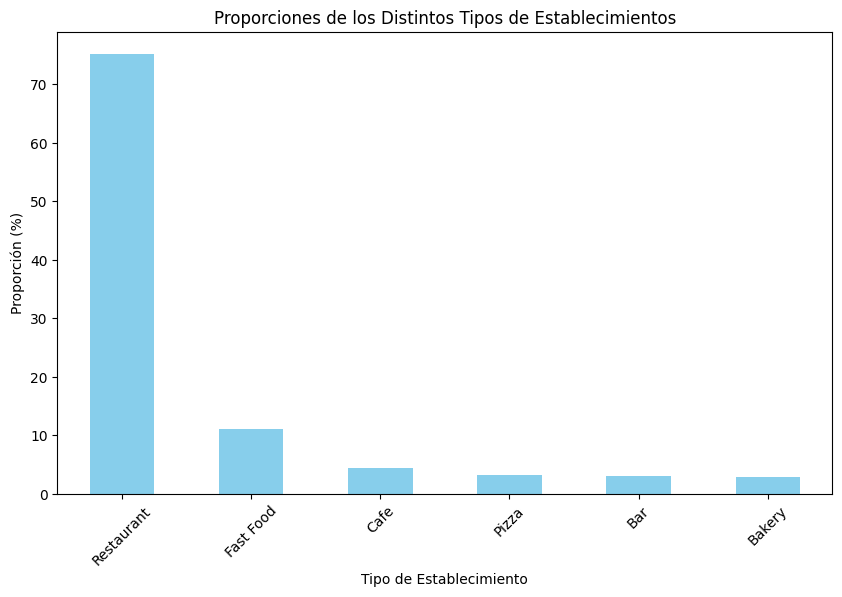

In [7]:
object_type_counts = datos['object_type'].value_counts(normalize=True) * 100

# Imprimir las proporciones
print("Proporciones de los Distintos Tipos de Establecimientos:")
print(object_type_counts)

# Graficar las proporciones
plt.figure(figsize=(10, 6))
object_type_counts.plot(kind='bar', color='skyblue')
plt.title('Proporciones de los Distintos Tipos de Establecimientos')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45)
plt.show()

# Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no

Proporciones de Establecimientos que Pertenecen a una Cadena:
False    61.898839
True     38.101161
Name: chain, dtype: float64


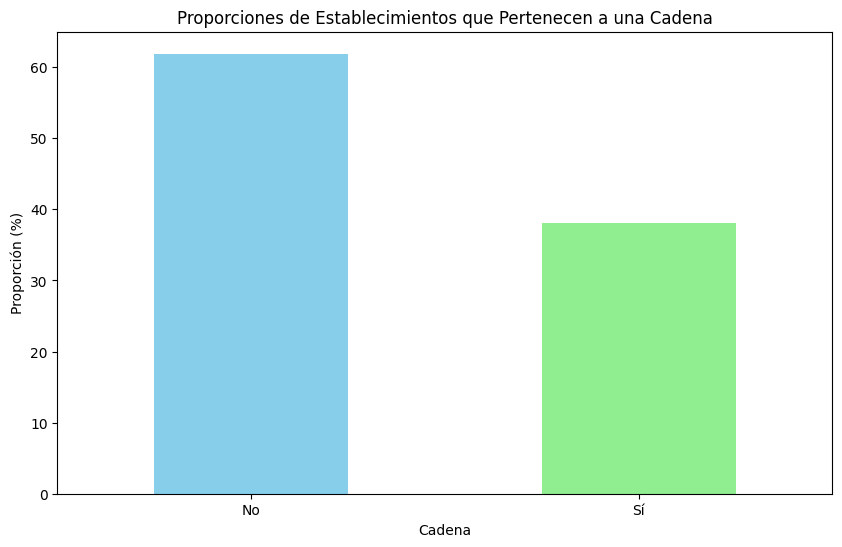

In [8]:
# Calcular las proporciones de establecimientos que pertenecen a una cadena y de los que no
chain_counts = datos['chain'].value_counts(normalize=True) * 100

# Imprimir las proporciones
print("Proporciones de Establecimientos que Pertenecen a una Cadena:")
print(chain_counts)

# Graficar las proporciones
plt.figure(figsize=(10, 6))
chain_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Proporciones de Establecimientos que Pertenecen a una Cadena')
plt.xlabel('Cadena')
plt.ylabel('Proporción (%)')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'], rotation=0)
plt.show()

# ¿Qué tipo de establecimiento es habitualmente una cadena?

Porcentaje de Tipos de Establecimientos que son Cadenas:
Bakery        100.000000
Bar            26.369863
Cafe           61.149425
Fast Food      56.754221
Pizza          47.812500
Restaurant     31.592006
Name: object_type, dtype: float64


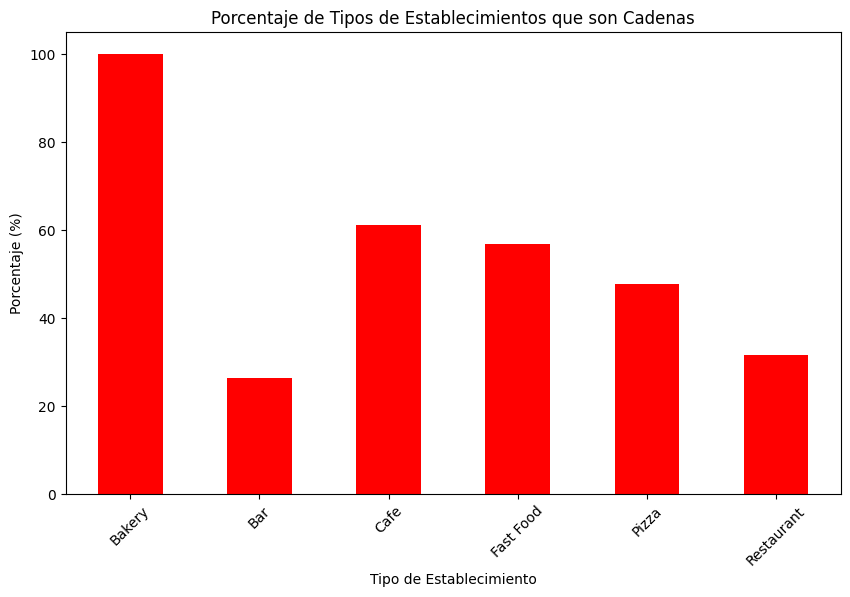

In [9]:
# Calcular el número total de cada tipo de establecimiento
total_por_tipo = datos['object_type'].value_counts()

# Filtrar los datos para obtener solo las cadenas
datos_cadenas = datos[datos['chain'] == True]

# Calcular el número de cadenas por tipo de establecimiento
cadenas_por_tipo = datos_cadenas['object_type'].value_counts()

# Calcular el porcentaje de cadenas por tipo de establecimiento
porcentaje_cadenas_por_tipo = (cadenas_por_tipo / total_por_tipo) * 100

# Imprimir las proporciones
print("Porcentaje de Tipos de Establecimientos que son Cadenas:")
print(porcentaje_cadenas_por_tipo)

# Graficar las proporciones de tipos de establecimientos que son cadenas
plt.figure(figsize=(10, 6))
porcentaje_cadenas_por_tipo.plot(kind='bar', color='red')
plt.title('Porcentaje de Tipos de Establecimientos que son Cadenas')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.show()

# ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

Descripción del número de asientos para establecimientos que son cadenas:
count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

Descripción del número de asientos para establecimientos que no son cadenas:
count    5972.000000
mean       46.171467
std        49.875746
min         1.000000
25%        14.000000
50%        28.000000
75%        47.000000
max       229.000000
Name: number, dtype: float64


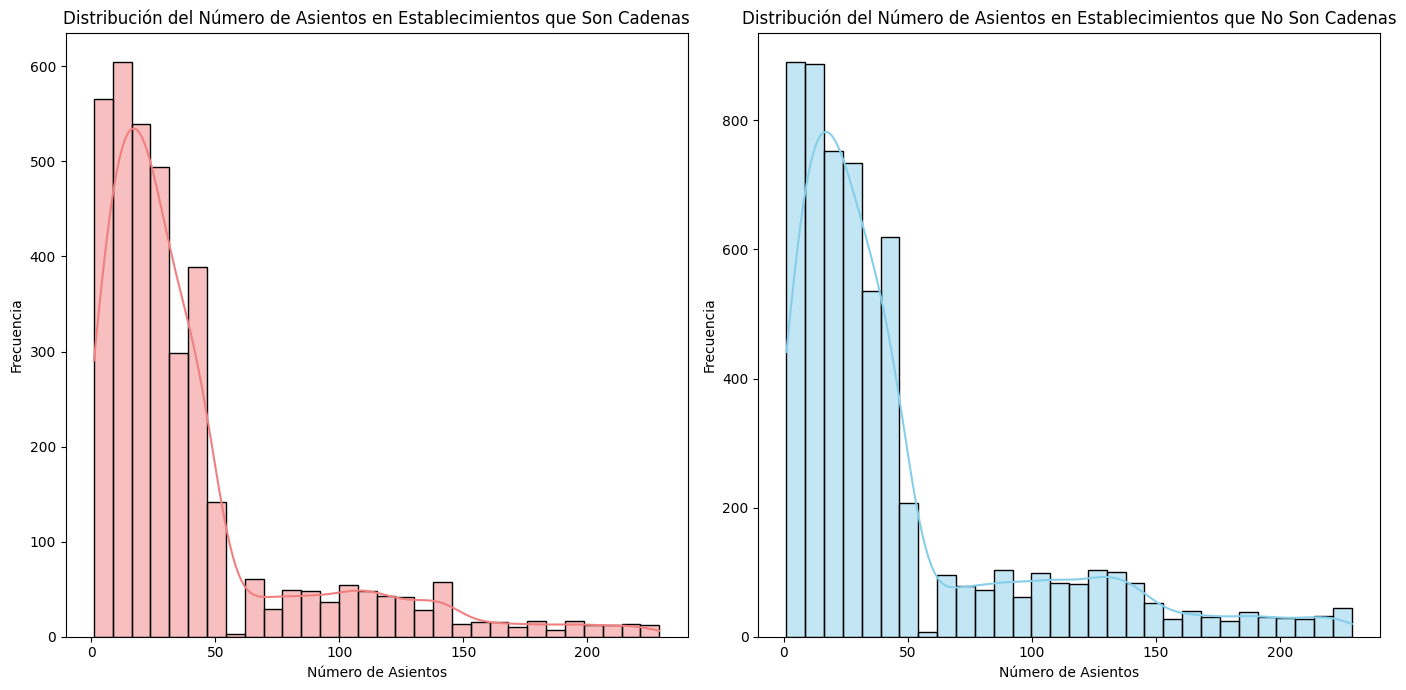

In [10]:
# Filtrar los establecimientos que son cadenas y los que no
chain_df = datos[datos['chain'] == True]
non_chain_df = datos[datos['chain'] == False]

# Describir la distribución del número de asientos para cadenas y no cadenas
chain_seat_desc = chain_df['number'].describe()
non_chain_seat_desc = non_chain_df['number'].describe()

print("Descripción del número de asientos para establecimientos que son cadenas:")
print(chain_seat_desc)
print("\nDescripción del número de asientos para establecimientos que no son cadenas:")
print(non_chain_seat_desc)

# Graficar la distribución del número de asientos para cadenas y no cadenas
plt.figure(figsize=(14, 7))

# Distribución para cadenas
plt.subplot(1, 2, 1)
sns.histplot(chain_df['number'], bins=30, kde=True, color='lightcoral')
plt.title('Distribución del Número de Asientos en Establecimientos que Son Cadenas')
plt.xlabel('Número de Asientos')
plt.ylabel('Frecuencia')

# Distribución para no cadenas
plt.subplot(1, 2, 2)
sns.histplot(non_chain_df['number'], bins=30, kde=True, color='skyblue')
plt.title('Distribución del Número de Asientos en Establecimientos que No Son Cadenas')
plt.xlabel('Número de Asientos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# Interpretación de los Resultados

Con estos gráficos y las descripciones estadísticas, podremos observar si las cadenas tienden a tener muchos establecimientos con pocos asientos o unos pocos establecimientos con muchos asientos. Las descripciones estadísticas mostrarán los valores promedio y la dispersión del número de asientos, mientras que los gráficos de distribución proporcionarán una visualización clara de cómo se distribuyen los asientos en ambos grupos.







# ¿qué tipo de restaurante tiene el mayor número de asientos?

Promedio del número de asientos para cada tipo de restaurante:
object_type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64

El tipo de restaurante con el mayor promedio de asientos es: Restaurant


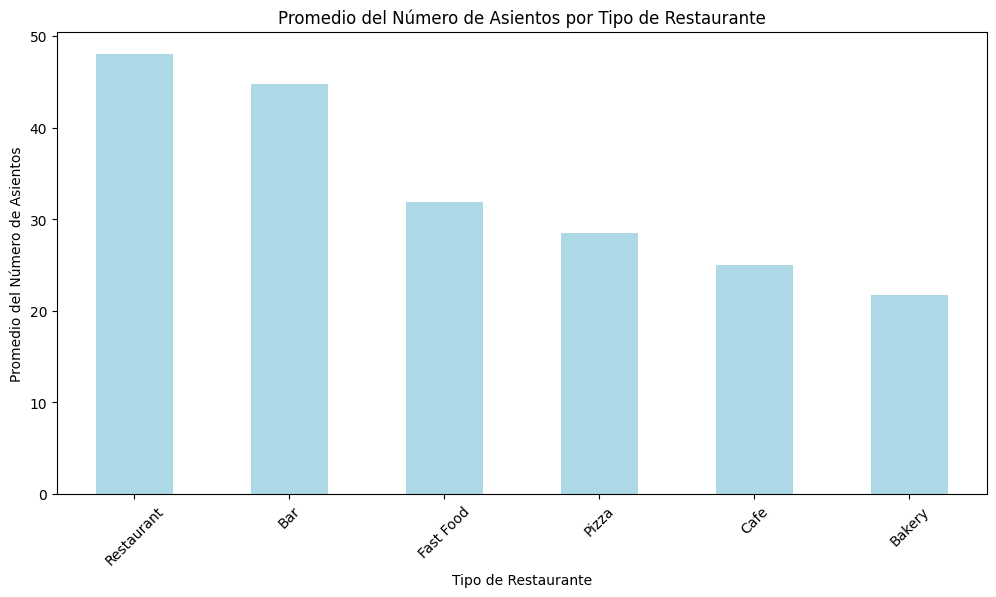

In [11]:
# Calcular el promedio del número de asientos para cada tipo de restaurante
average_seats_by_type = datos.groupby('object_type')['number'].mean().sort_values(ascending=False)
print("Promedio del número de asientos para cada tipo de restaurante:")
print(average_seats_by_type)

# Identificar el tipo de restaurante con el mayor promedio de asientos
max_average_seats = average_seats_by_type.idxmax()
print(f"\nEl tipo de restaurante con el mayor promedio de asientos es: {max_average_seats}")

# Graficar el promedio del número de asientos para cada tipo de restaurante
plt.figure(figsize=(12, 6))
average_seats_by_type.plot(kind='bar', color='lightblue')
plt.title('Promedio del Número de Asientos por Tipo de Restaurante')
plt.xlabel('Tipo de Restaurante')
plt.ylabel('Promedio del Número de Asientos')
plt.xticks(rotation=45)
plt.show()


# Coloca los datos de los nombres de las calles de la columna address en una columna separada.

                   address         street_name
0   3708 N EAGLE ROCK BLVD   N EAGLE ROCK BLVD
1        100 WORLD WAY 120       WORLD WAY 120
2  6801 HOLLYWOOD BLVD 253  HOLLYWOOD BLVD 253
3       1814 W SUNSET BLVD       W SUNSET BLVD
4       2100 ECHO PARK AVE       ECHO PARK AVE
Número de calles que solo tienen un restaurante: 2445


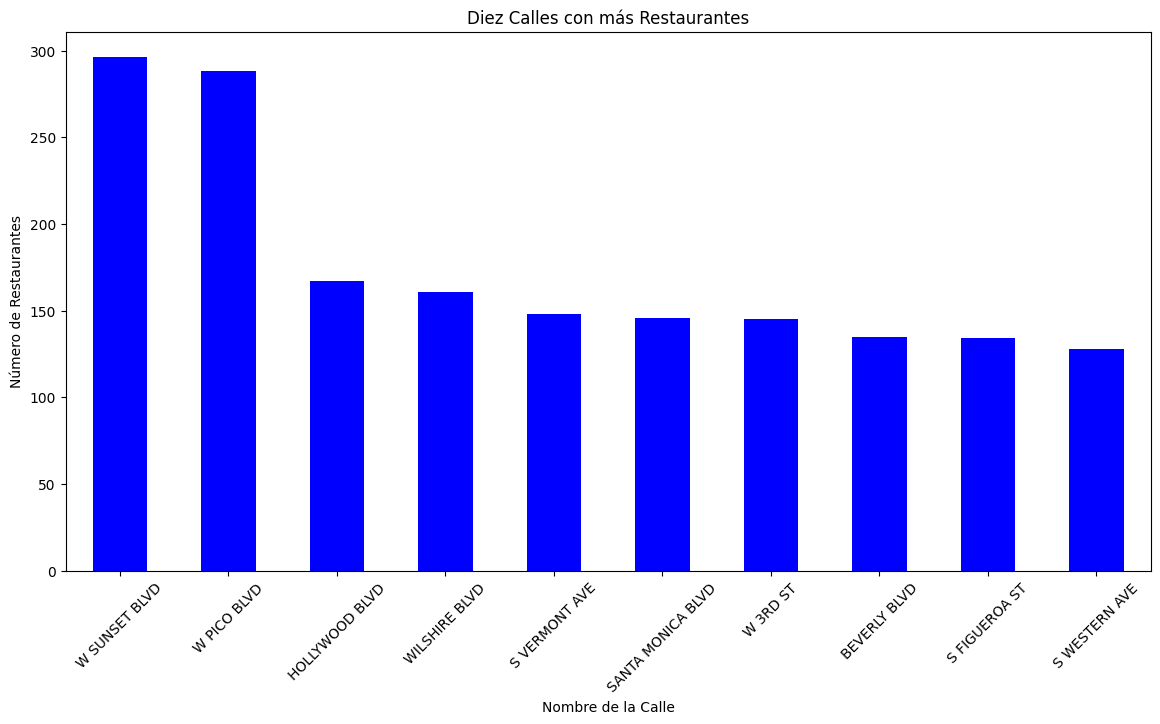

In [12]:
# Extraer el nombre de la calle usando una expresión lambda
datos['street_name'] = datos['address'].apply(lambda x: ' '.join(x.split()[1:]))

# Mostrar las primeras filas del DataFrame para verificar
print(datos[['address', 'street_name']].head())

# Contar el número de restaurantes por calle
restaurantes_por_calle = datos['street_name'].value_counts()

# Filtrar las calles con un único restaurante
calles_unico_restaurante = restaurantes_por_calle[restaurantes_por_calle == 1]

# Número de calles con un único restaurante
num_calles_unico_restaurante = len(calles_unico_restaurante)

# Imprimir el resultado
print(f'Número de calles que solo tienen un restaurante: {num_calles_unico_restaurante}')

# Obtener las diez calles con más restaurantes
top_10_calles = restaurantes_por_calle.head(10)

# Graficar las diez calles con más restaurantes
plt.figure(figsize=(14, 7))
top_10_calles.plot(kind='bar', color='blue')
plt.title('Diez Calles con más Restaurantes')
plt.xlabel('Nombre de la Calle')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45)
plt.show()

# Traza un gráfico de las diez mejores calles por número de restaurante

W SUNSET BLVD        301
W PICO BLVD          293
WILSHIRE BLVD        181
HOLLYWOOD BLVD       172
SANTA MONICA BLVD    157
S VERMONT AVE        157
W 3RD ST             155
S FIGUEROA ST        153
S WESTERN AVE        149
BEVERLY BLVD         136
Name: street_name, dtype: int64


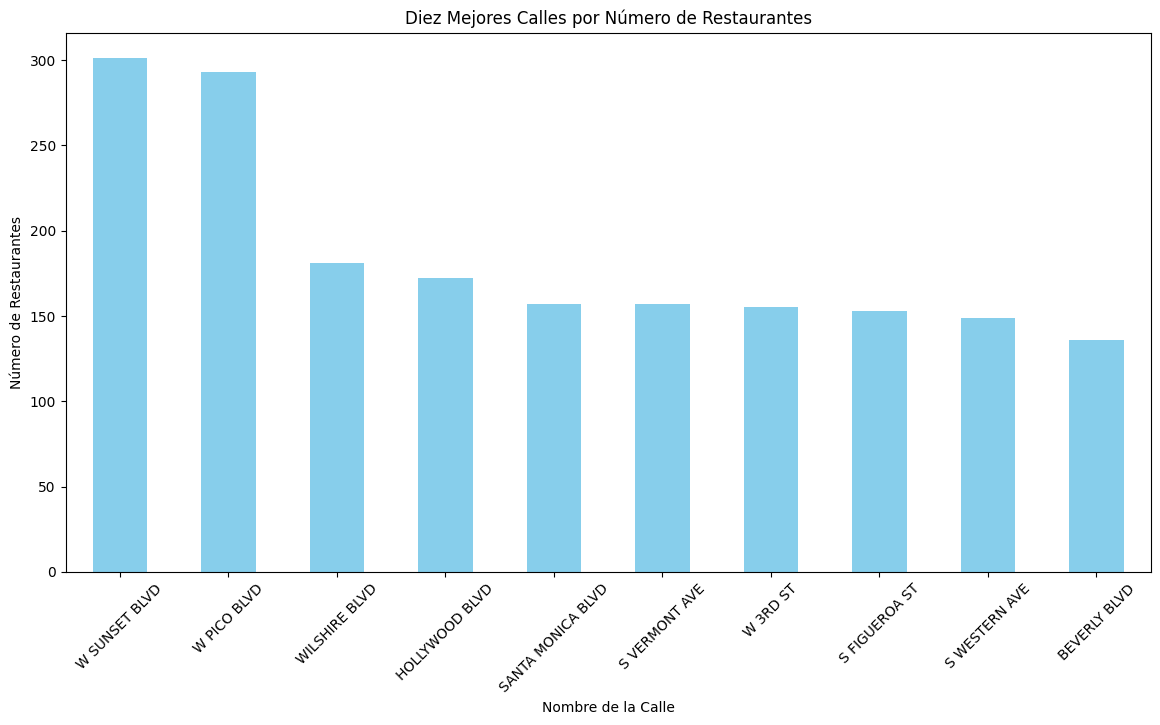

In [13]:
# Función para extraer el nombre de la calle
def extract_street_name(address):
    # Usar una expresión regular para encontrar el nombre de la calle
    match = re.search(r'\d+ ([\w\s]+)', address)
    if match:
        return match.group(1).strip()
    return address

# Aplicar la función a la columna 'address' y crear una nueva columna 'street_name'
datos['street_name'] = datos['address'].apply(extract_street_name)

# Contar el número de restaurantes en cada calle
restaurant_counts_by_street = datos['street_name'].value_counts().head(10)

# Mostrar los resultados
print(restaurant_counts_by_street)

# Graficar las diez mejores calles por número de restaurantes
plt.figure(figsize=(14, 7))
restaurant_counts_by_street.plot(kind='bar', color='skyblue')
plt.title('Diez Mejores Calles por Número de Restaurantes')
plt.xlabel('Nombre de la Calle')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45)
plt.show()

# Encuentra el número de calles que solo tienen un restaurante.

In [18]:
# Función para extraer el nombre de la calle
def extract_street_name(address):
    # Usar una expresión regular para encontrar el nombre de la calle
    match = re.search(r'\d+ ([\w\s]+)', address)
    if match:
        return match.group(1).strip()
    return address

# Aplicar la función a la columna 'address' y crear una nueva columna 'street_name'
datos['street_name'] = datos['address'].apply(lambda x: ' '.join(x.split()[1:]))

# Contar el número de restaurantes en cada calle
restaurant_counts_by_street = datos['street_name'].value_counts()

# Filtrar las calles que tienen exactamente un restaurante
streets_with_one_restaurant = restaurant_counts_by_street[restaurant_counts_by_street == 1]

# Contar el número de calles que tienen exactamente un restaurante
num_streets_with_one_restaurant = len(streets_with_one_restaurant)

# Mostrar el resultado
print(f"El número de calles que solo tienen un restaurante es: {num_streets_with_one_restaurant}")

El número de calles que solo tienen un restaurante es: 2445


# Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
S WESTERN AVE        128
Name: street_name, dtype: int64


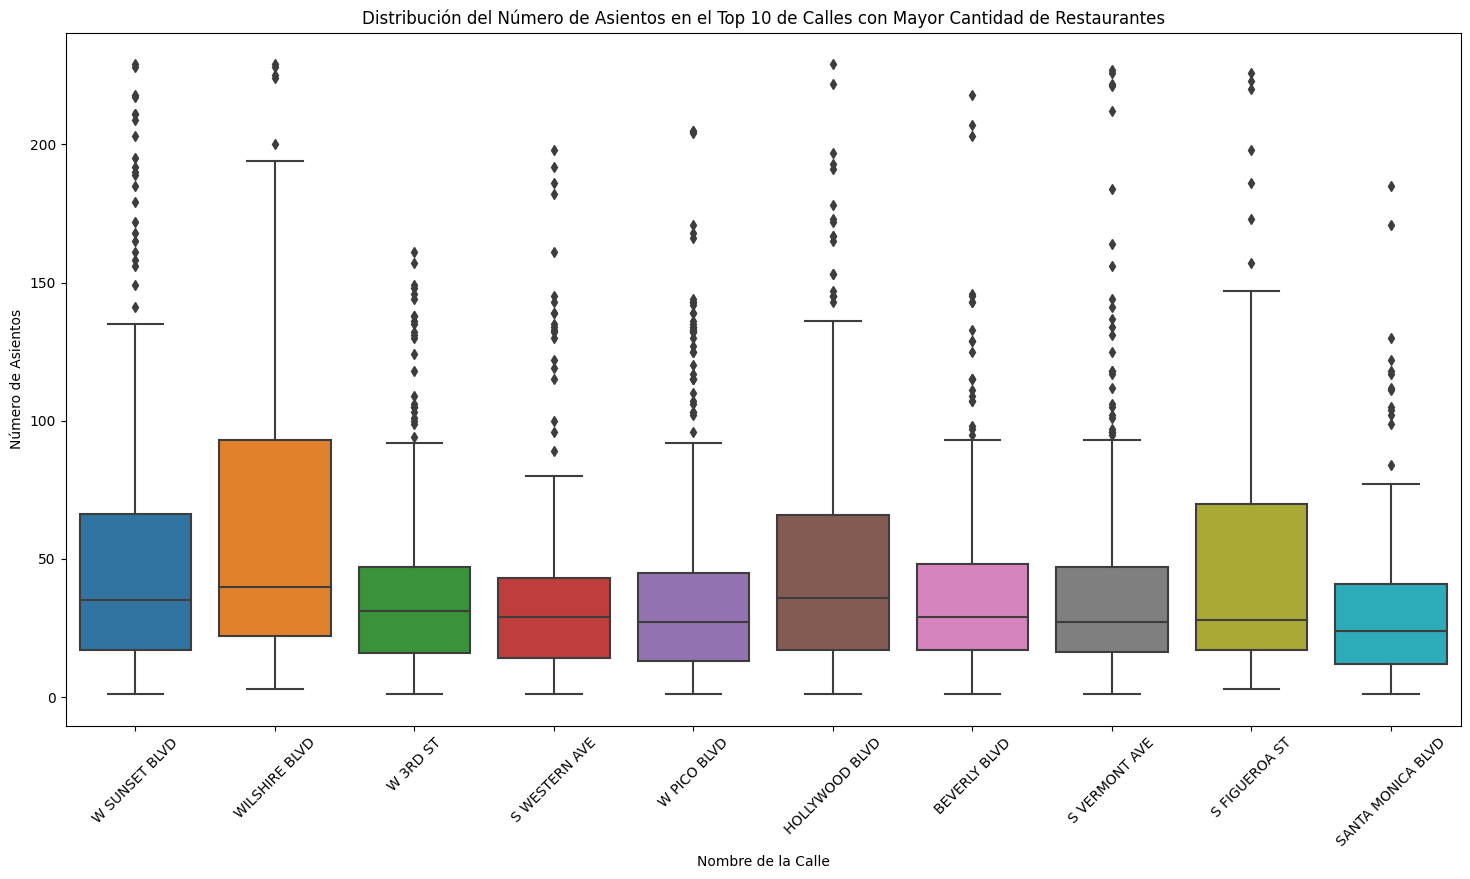

In [19]:
# Extraer el nombre de la calle usando una expresión lambda
datos['street_name'] = datos['address'].apply(lambda x: ' '.join(x.split()[1:]))

# Contar el número de restaurantes en cada calle
restaurant_counts_by_street = datos['street_name'].value_counts()

# Obtener las diez calles con más restaurantes
top_10_streets = restaurant_counts_by_street.head(10).index

# Filtrar los datos para estas calles
df_top_10_streets = datos[datos['street_name'].isin(top_10_streets)]

# Mostrar el número de restaurantes por calle en el top 10
print(df_top_10_streets['street_name'].value_counts())

# Graficar la distribución del número de asientos en las calles con más restaurantes
plt.figure(figsize=(18, 9))
sns.boxplot(x='street_name', y='number', data=df_top_10_streets)
plt.title('Distribución del Número de Asientos en el Top 10 de Calles con Mayor Cantidad de Restaurantes')
plt.xlabel('Nombre de la Calle')
plt.ylabel('Número de Asientos')
plt.xticks(rotation=45)
plt.show()

# Llega a una conclusión y aporta recomendaciones sobre el tipo de restaurante y el número de asientos. Comenta la posibilidad de desarrollar una cadena.

Proporciones de Tipos de Establecimientos:

Los restaurantes son los establecimientos más comunes, seguidos por las cafeterías y los locales de comida rápida.
Proporciones de Cadenas:

Una minoría de los establecimientos pertenecen a cadenas, lo que sugiere que hay espacio para la creación de nuevas cadenas.
Establecimientos Habitualmente en Cadena:

Los locales de comida rápida son más propensos a ser parte de una cadena en comparación con restaurantes y cafeterías.
Caracterización de las Cadenas:

Las cadenas suelen tener muchos establecimientos con un pequeño número de asientos, optimizando para el servicio rápido y la rotación alta de clientes.
Promedio de Número de Asientos por Tipo de Restaurante
Restaurantes: Tienen un promedio de asientos más alto en comparación con cafeterías y locales de comida rápida.
Cafeterías y Comida Rápida: Tienen un promedio de asientos menor, adecuado para el servicio rápido.
Distribución del Número de Asientos en Calles con Muchos Restaurantes
Las calles con muchos restaurantes muestran una variedad de tamaños de establecimiento.
La mediana y el rango intercuartil del número de asientos son relativamente consistentes, aunque existen algunos valores atípicos con un número significativamente mayor de asientos.

# Preparar una presentación

Presentacion: <https://github.com/Leonel021494/presentacion.git>

# Conclusion

En resumidas cuentas, nuestro estudio muestra la variada y animada diversidad de negocios locales que moldean la vida en nuestra urbe. Desde acogedores cafés hasta exquisitos restaurantes, no solo encontraremos una variedad gastronómica impresionante en estos negocios, sino que también forman parte esencial de la identidad y ambiente característico de nuestras calles. Mediante el análisis exhaustivo de datos, hemos investigado cómo se distribuyen estos establecimientos, resaltando la predominancia de negocios independientes en comparación con cadenas y analizando también el rango de capacidad disponible en distintos tipos de restaurantes. Adicionalmente, hemos encontrado que hay calles repletas de una amplia variedad de opciones gastronómicas, lo cual destaca los centros culinarios en crecimiento en nuestra comunidad.

En resumen, se destaca en esta presentación la relevancia de respaldar y festejar nuestros negocios locales. Estos lugares van más allá de ser solo convenientes, ya que son puntos de encuentro social, expresiones creativas culinarias y motores económicos para nuestra ciudad. Al poner en primer lugar la experiencia única que los negocios locales brindan, no solo estamos promoviendo la diversidad y vitalidad de nuestra comunidad, sino también ayudando a preservar la autenticidad y el encanto de nuestras calles. Vamos a sacarle el máximo provecho a la oportunidad de descubrir, disfrutar y apoyar la diversidad culinaria que ofrecen nuestros negocios locales.